In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import scipy.stats as stats
from bioinfokit.analys import stat

import statsmodels.api as sm


In [2]:
#References:
    
#https://www.youtube.com/watch?v=FhZB1oGVrYc

In [3]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install dfply

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install scikit-learn

In [6]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pingouin as pg
from pingouin import ancova
from dfply import *


In [8]:
import patsy
import statsmodels

from plotly import express
from plotly import graph_objects
from plotly import subplots
from plotly import io

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [9]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [10]:

df.shape

(768, 9)

In [11]:
#Checking for any null values
#no null values found
# however, there are attribute value 0 found for various columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EDA of the dataset

In [12]:
# Bias in the data

#Population age = 21 year olds

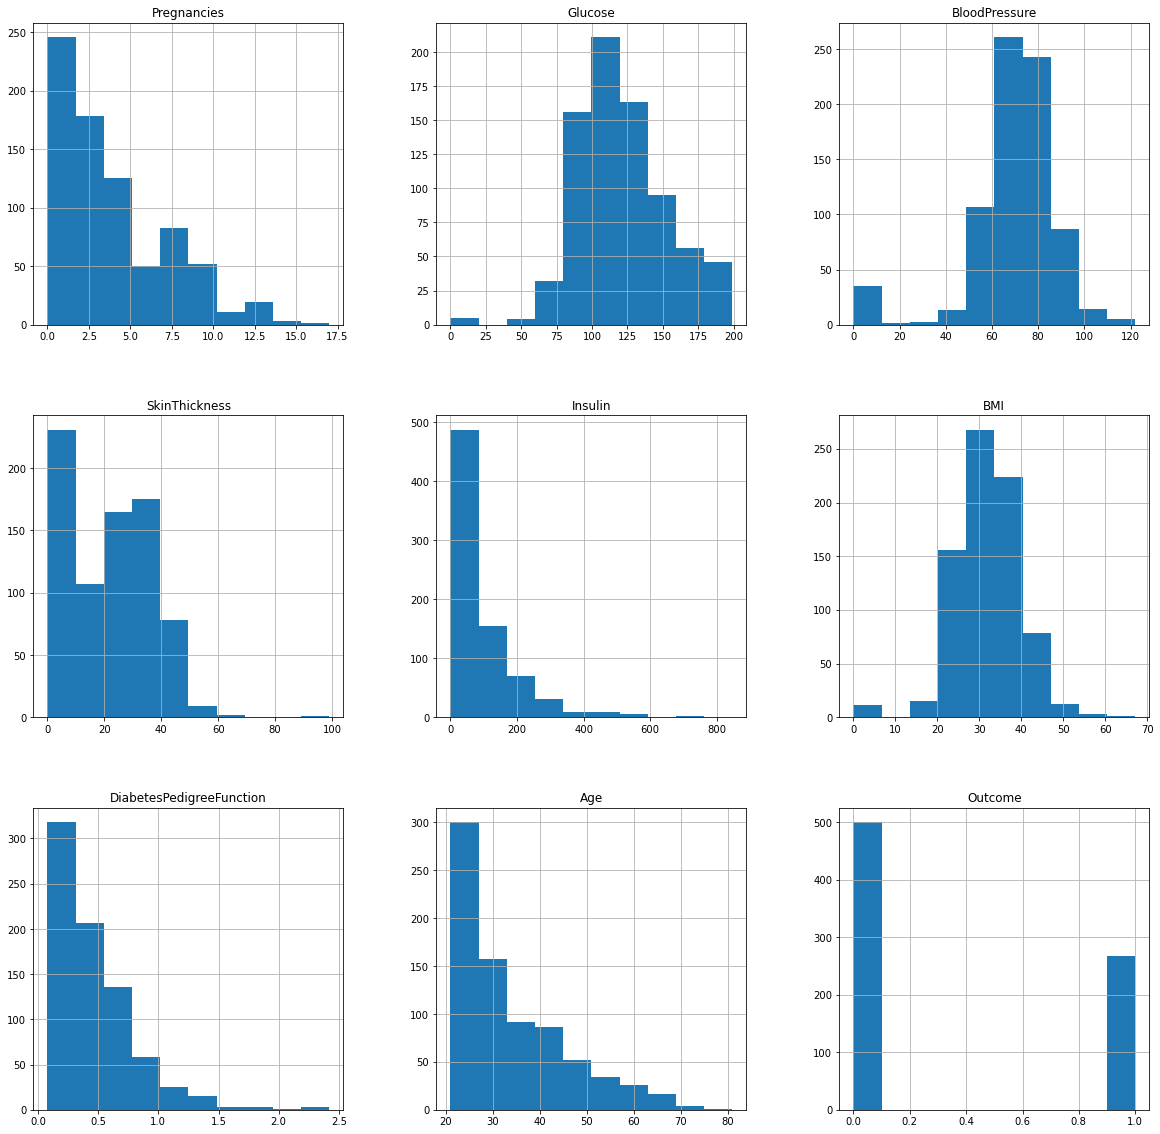

In [13]:
hplot = df.hist(figsize = (20,20))

In [14]:
# check the minimum and maximum values
# minimum for columns glucose to BMI containing 0 attribute values need to be explored
# if null values are to be ignored, how many of them are there within this dataset?
summary = df.describe()

summary

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [15]:
df['Outcome'].value_counts()
#Print ('Proportion_of_Diabetes_Patients_dataset') = 268/768

0    500
1    268
Name: Outcome, dtype: int64

# Data cleaning

In [16]:
#df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
#df.iloc[:, 1:6].replace(0, df.mean(axis =0), inplace =True)


df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

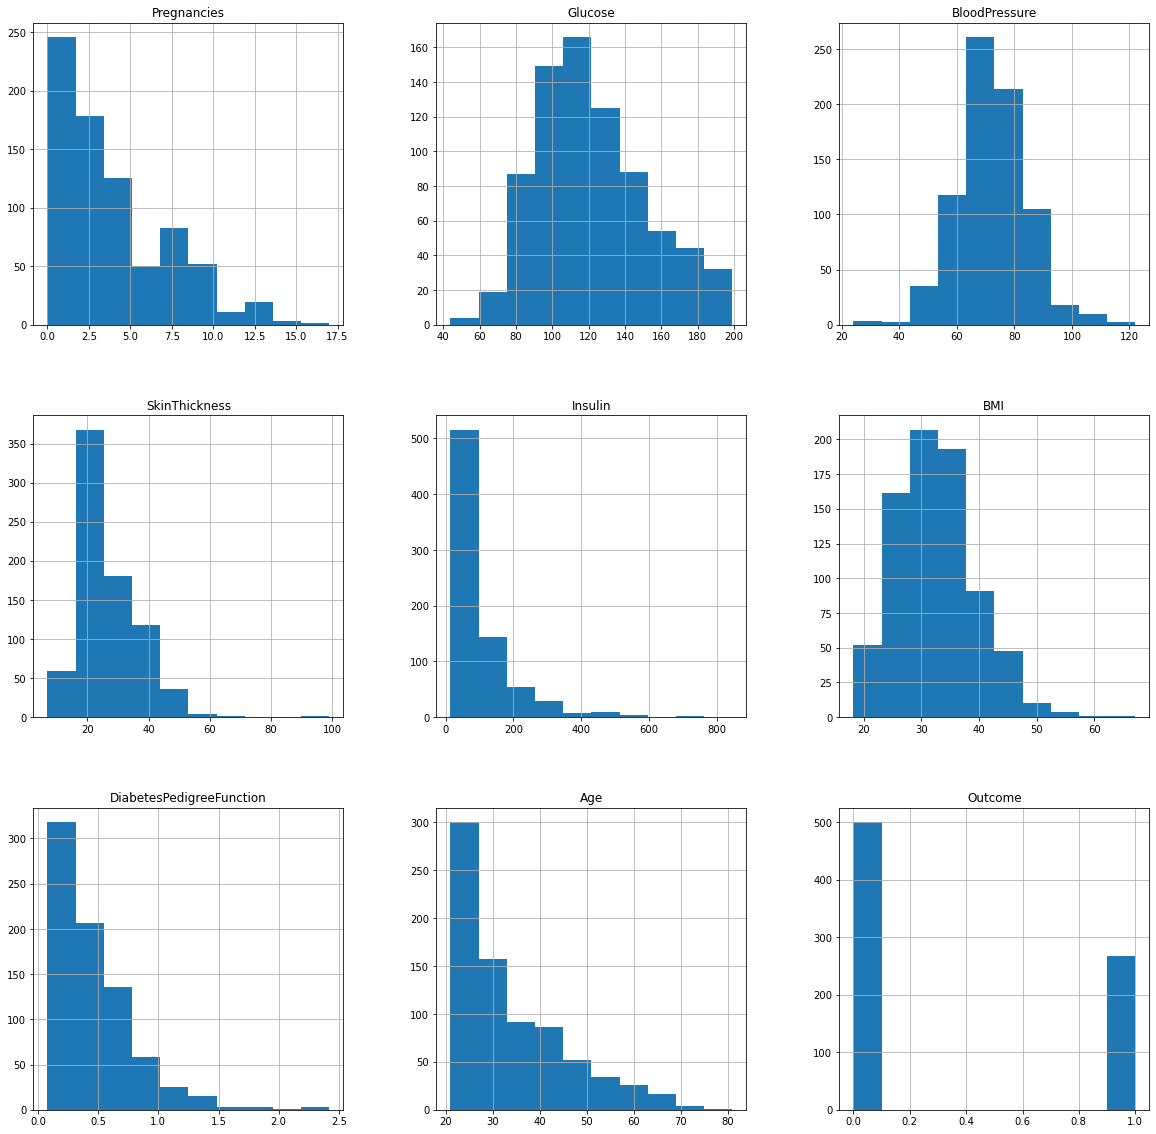

In [17]:
hplot = df.hist(figsize = (20,20))

Text(0.5, 1.0, 'Boxplot distribution for diabetes related attributes')

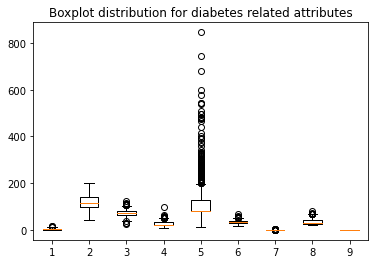

In [18]:
#boxplot the attributes
df1 = df.iloc[:, 0:9]
plt.boxplot(df1)
plt.title('Boxplot distribution for diabetes related attributes')



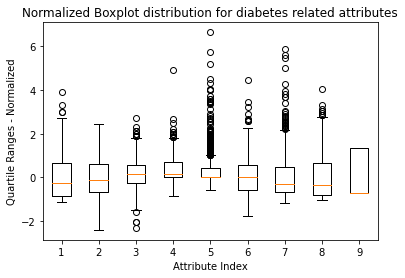

In [19]:
#normalize data for boxplot

df_normalized = df.iloc [:, 0:9]

for i in range (9):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    df_normalized.iloc[:, i:(i+1)]=(df_normalized.iloc[:, i:(i+1)]- mean)/sd
    
df2 = df_normalized.values  
plt.boxplot(df2)
plt.xlabel('Attribute Index')
plt.ylabel(('Quartile Ranges - Normalized'))
plt.title('Normalized Boxplot distribution for diabetes related attributes')
plt.show()

# Correlation between every variable

In [20]:
#find correlation using heat map

corr_diabetes = df.iloc[:, 0:9].corr()

corr_diabetes




Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.013376   
Glucose                      0.127964  1.000000       0.219666       0.160766   
BloodPressure                0.208984  0.219666       1.000000       0.134155   
SkinThickness                0.013376  0.160766       0.134155       1.000000   
Insulin                     -0.018082  0.396597       0.010926       0.240361   
BMI                          0.021546  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.154961   
Age                          0.544341  0.266600       0.326740       0.026423   
Outcome                      0.221898  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.018082  0.021546                 -0.033523   
Glucose                   0.396597  0.231478                  0.137106   
BloodPressure             0.010926  0.281231                  0.000371   
SkinThickness             0.240361  0.535703                  0.154961   
Insulin                   1.000000  0.189856                  0.157806   
BMI                       0.189856  1.000000                  0.153508   
DiabetesPedigreeFunction  0.157806  0.153508                  1.000000   
Age                       0.038652  0.025748                  0.033561   
Outcome                   0.179185  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.026423  0.175026  
Insulin                   0.038652  0.179185  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

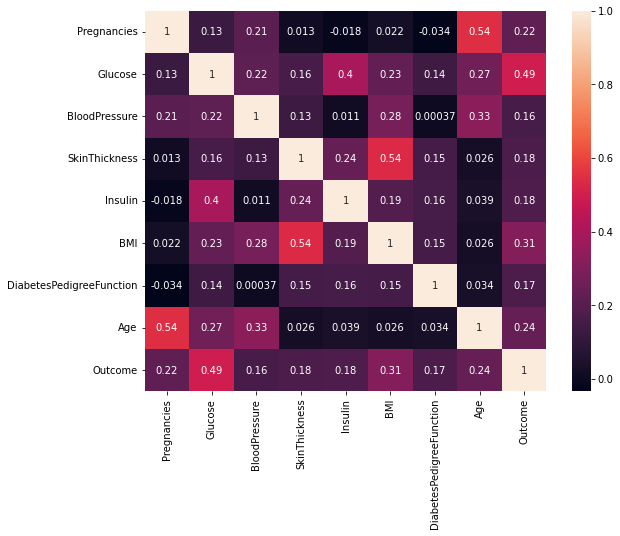

In [21]:

#Using heatmap to visualize correlations
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr_diabetes, annot =True)
plt.show()



<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

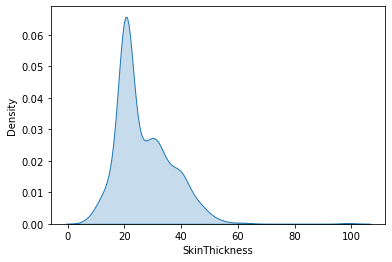

In [22]:
sns.kdeplot(df['SkinThickness'], shade = True)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

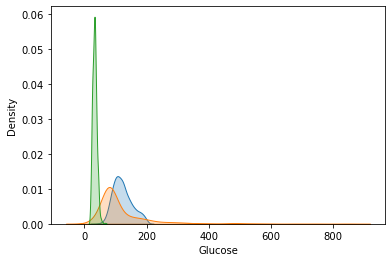

In [23]:
#Bivariate Seaborn Kdeplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['Glucose'], shade =True)
sns.kdeplot(df['Insulin'], shade = True)
sns.kdeplot(df['BMI'], shade = True)

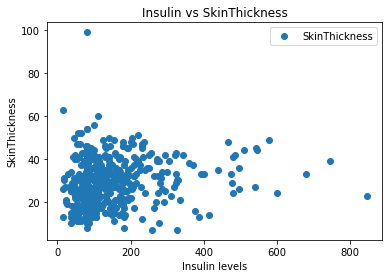

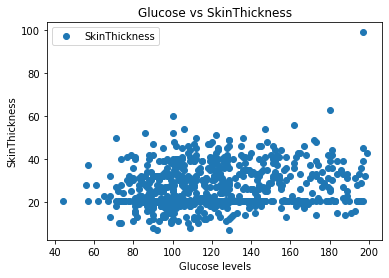

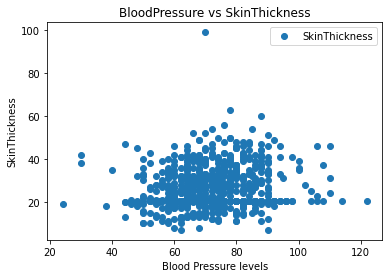

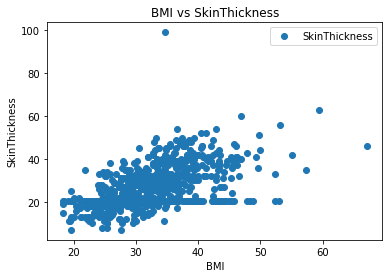

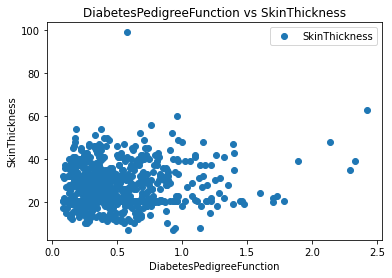

In [24]:
#plot

df.plot(x = 'Insulin', y = 'SkinThickness', style = 'o')
plt.title('Insulin vs SkinThickness')
plt.xlabel('Insulin levels')
plt.ylabel('SkinThickness')
plt.show()

df.plot(x = 'Glucose', y = 'SkinThickness', style = 'o')
plt.title('Glucose vs SkinThickness')
plt.xlabel('Glucose levels')
plt.ylabel('SkinThickness')
plt.show()


df.plot(x = 'BloodPressure', y = 'SkinThickness', style = 'o')
plt.title('BloodPressure vs SkinThickness')
plt.xlabel('Blood Pressure levels')
plt.ylabel('SkinThickness')
plt.show()


df.plot(x = 'BMI', y = 'SkinThickness', style = 'o')
plt.title('BMI vs SkinThickness')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.show()


df.plot(x = 'DiabetesPedigreeFunction', y = 'SkinThickness', style = 'o')
plt.title('DiabetesPedigreeFunction vs SkinThickness')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('SkinThickness')
plt.show()

In [25]:
#Preparing data for ANCOVA
#Glucose continuous variable can only be broken down into 2 categorical variable
# BMI continuous variable to be broken down into categorical variables

Bmi_category =pd.cut(df.BMI,bins=[0,18.5,25,30,67.10],
       labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])




#https://www.cdc.gov/obesity/adult/defining.html

In [26]:
df.insert(6, column='BMI_category', value = Bmi_category, allow_duplicates=True)

df

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

    BMI_category  DiabetesPedigreeFunction  Age  Outcome  
0          Obese                     0.627   50        1  
1     Overweight                     0.351   31        0  
2        Healthy                     0.672   32        1  
3     Overweight                     0.167   21        0  
4          Obese                     2.288   33        1  
..           ...                       ...  ...      ...  
763        Obese                     0.171   63        0  
764        Obese                     0.340   27        0  
765   Overweight                     0.245   30        0  
766        Obese                     0.349   47        1  
767        Obese                     0.315   23        0  

[768 rows x 10 columns]

In [27]:
df_new = df.drop("BMI", axis=1)

df_new

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0              6    148.0           72.0      35.000000   79.799479   
1              1     85.0           66.0      29.000000   79.799479   
2              8    183.0           64.0      20.536458   79.799479   
3              1     89.0           66.0      23.000000   94.000000   
4              0    137.0           40.0      35.000000  168.000000   
..           ...      ...            ...            ...         ...   
763           10    101.0           76.0      48.000000  180.000000   
764            2    122.0           70.0      27.000000   79.799479   
765            5    121.0           72.0      23.000000  112.000000   
766            1    126.0           60.0      20.536458   79.799479   
767            1     93.0           70.0      31.000000   79.799479   

    BMI_category  DiabetesPedigreeFunction  Age  Outcome  
0          Obese                     0.627   50        1  
1     Overweight                     0.351   31        0  
2        Healthy                     0.672   32        1  
3     Overweight                     0.167   21        0  
4          Obese                     2.288   33        1  
..           ...                       ...  ...      ...  
763        Obese                     0.171   63        0  
764        Obese                     0.340   27        0  
765   Overweight                     0.245   30        0  
766        Obese                     0.349   47        1  
767        Obese                     0.315   23        0  

[768 rows x 9 columns]

In [28]:
BMI_distribution = df_new['BMI_category'].value_counts()

BMI_distribution


Obese          476
Overweight     180
Healthy        108
Underweight      4
Name: BMI_category, dtype: int64

Text(0.5, 1.0, 'BMI Weight Categories')

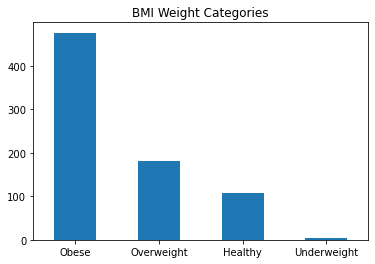

In [29]:
BMI_distribution.plot.bar(rot=0)
plt.title('BMI Weight Categories')




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


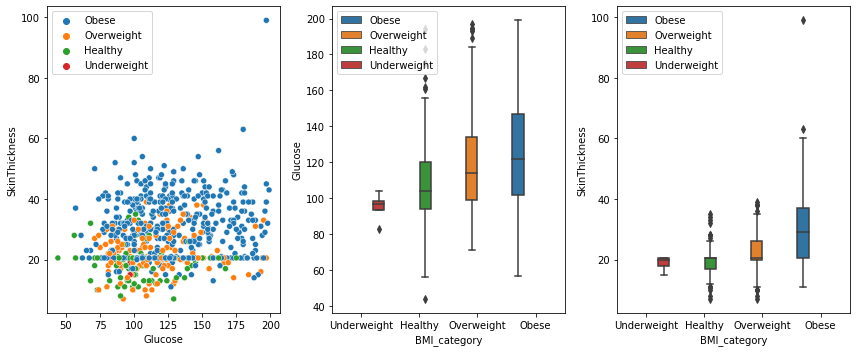

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3,figsize=(12,5))
sns.scatterplot(data=df_new, x="Glucose", y="SkinThickness", hue=df.BMI_category.tolist(), ax=axs[0])
plt.legend(loc='upper right')
sns.boxplot(data=df_new, x="BMI_category", y="Glucose", hue=df.BMI_category.tolist(), ax=axs[1])
sns.boxplot(data=df_new, x="BMI_category", y="SkinThickness", hue=df.BMI_category.tolist(), ax=axs[2])
plt.legend(loc='upper left')
ax.set_xticklabels(ax.get_xticks(), rotation = 70)
fig.tight_layout()
plt.show()

In [31]:
df_new.groupby('BMI_category').Glucose.describe()

count        mean        std   min    25%    50%     75%    max
BMI_category                                                                 
Underweight     4.0   95.250000   8.808140  83.0   93.5   97.0   98.75  104.0
Healthy       108.0  108.211986  25.559792  44.0   94.0  104.0  120.00  194.0
Overweight    180.0  118.027192  26.944413  71.0   99.0  114.0  134.00  197.0
Obese         476.0  126.341772  31.632448  57.0  102.0  122.0  147.00  199.0

In [32]:
df_new.groupby('BMI_category').SkinThickness.describe()

count       mean       std   min        25%        50%  \
BMI_category                                                           
Underweight     4.0  18.768229  2.614481  15.0  18.000000  19.768229   
Healthy       108.0  19.084635  4.959140   7.0  16.750000  20.536458   
Overweight    180.0  22.360532  6.160327   7.0  19.750000  20.536458   
Obese         476.0  29.984594  9.912182  11.0  20.536458  29.000000   

                    75%        max  
BMI_category                        
Underweight   20.536458  20.536458  
Healthy       20.536458  35.000000  
Overweight    26.000000  39.000000  
Obese         37.000000  99.000000

# # Model without controlling for COVAR Glucose: ANOVA

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#ordinary least squares (OLS) model

mod = ols('SkinThickness~ BMI_category', data = df_new).fit()
anova_table = sm.stats.anova_lm(mod, typ= 2)

anova_table

sum_sq     df          F        PR(>F)
BMI_category  15033.192113    3.0  68.225928  4.262010e-39
Residual      56114.339668  764.0        NaN           NaN

p value < 0.05 
- which indicates that the p-value is significant.
- Therefore, we reject the null hypothesis 
- There are significant differences in terms of skin thickness between different BMI categories

In [34]:
mod.params


#SkinThickness = 18.77 + 0.40(BMI:Healthy)+ 3.67(BMI:Overweight)+ 11.09(BMI:Obese)

Intercept                     18.768229
BMI_category[T.Healthy]        0.316406
BMI_category[T.Overweight]     3.592303
BMI_category[T.Obese]         11.216365
dtype: float64

In [35]:
#use ANOVA bioinfokit to verify p value
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df = df_new, 
               res_var = 'SkinThickness', 
               anova_model = 'SkinThickness ~ C(BMI_category)')
res.anova_summary

df        sum_sq      mean_sq          F        PR(>F)
C(BMI_category)    3.0  15033.192113  5011.064038  68.225928  4.262010e-39
Residual         764.0  56114.339668    73.448089        NaN           NaN

In [36]:
#post hoc test corrections (Bonferroni group)

import scikit_posthocs as sp

In [37]:
sp.posthoc_ttest(df, val_col='SkinThickness', group_col='BMI_category', p_adjust=None, pool_sd=True )

#compairing significance for two related variables

Obese    Overweight       Healthy   Underweight
Obese        1.000000  9.422164e-01  4.072710e-01  9.322804e-03
Overweight   0.942216  1.000000e+00  1.751862e-03  3.206377e-30
Healthy      0.407271  1.751862e-03  1.000000e+00  7.359848e-23
Underweight  0.009323  3.206377e-30  7.359848e-23  1.000000e+00

In [38]:
#post hoc corrections (Bonferroni)

pair_t = mod.t_test_pairwise('BMI_category')
pair_t.result_frame

#significant difference in skinthickness between BMI groups in individuals
#obese -Underweight, healthy, overweight: sig. difference
#Overwight_Healthy sig: difference

#healthy -underweight - not significantly differrent
#the Bonferroni post hoc corrections are made to reduce the increase in error rates associated with multiple comparisons
#https://www.investopedia.com/terms/b/bonferroni-test.asp


coef   std err          t         P>|t|  \
Healthy-Underweight      0.316406  4.363725   0.072508  9.422164e-01   
Overweight-Underweight   3.592303  4.332444   0.829163  4.072710e-01   
Obese-Underweight       11.216365  4.303060   2.606602  9.322804e-03   
Overweight-Healthy       3.275897  1.043130   3.140450  1.751862e-03   
Obese-Healthy           10.899958  0.913443  11.932832  3.206377e-30   
Obese-Overweight         7.624061  0.749898  10.166792  7.359848e-23   

                        Conf. Int. Low  Conf. Int. Upp.     pvalue-hs  \
Healthy-Underweight          -8.249909         8.882721  9.422164e-01   
Overweight-Underweight       -4.912604        12.097210  6.486723e-01   
Obese-Underweight             2.769140        19.663589  2.770848e-02   
Overweight-Healthy            1.228156         5.323638  6.989057e-03   
Obese-Healthy                 9.106803        12.693114  1.923826e-29   
Obese-Overweight              6.151955         9.096167  3.679924e-22   

                        reject-hs  
Healthy-Underweight         False  
Overweight-Underweight      False  
Obese-Underweight            True  
Overweight-Healthy           True  
Obese-Healthy                True  
Obese-Overweight             True

In [39]:
#pairwise comparison

pt = pg.pairwise_tukey(dv='SkinThickness', between='BMI_category', effsize= 'cohen', data =df_new)

print(pt)


#cohens d measures effect size for the difference between two groups
#small= 0.2, med=0.5, Large=0.8
#difference between the groups is ___std.units
#magnitude of effect

#Obese indivduals have higher skinthickness than all of the other BMI categories
# Skin thickness difference in Obese and healthy, Obese and underweight have the highest effect size 
# high effect size in skinthickness between Overweight and obese individuals

             A           B    mean(A)    mean(B)       diff        se  \
0  Underweight     Healthy  18.768229  19.084635  -0.316406  4.363725   
1  Underweight  Overweight  18.768229  22.360532  -3.592303  4.332444   
2  Underweight       Obese  18.768229  29.984594 -11.216365  4.303060   
3      Healthy  Overweight  19.084635  22.360532  -3.275897  1.043130   
4      Healthy       Obese  19.084635  29.984594 -10.899958  0.913443   
5   Overweight       Obese  22.360532  29.984594  -7.624061  0.749898   

           T       p-tukey     cohen  
0  -0.072508  9.998632e-01 -0.036919  
1  -0.829163  8.406287e-01 -0.419163  
2  -2.606602  4.594058e-02 -1.308766  
3  -3.140450  9.469239e-03 -0.382243  
4 -11.932832  1.985079e-13 -1.271846  
5 -10.166792  1.985079e-13 -0.889603  


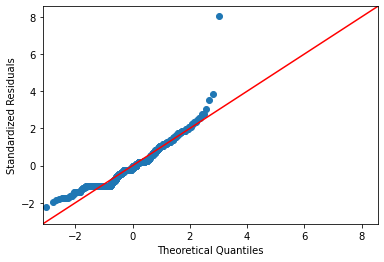

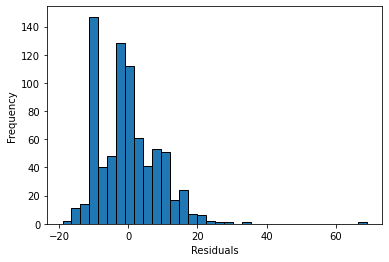

In [40]:
#QQ plot

import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(res.anova_std_residuals, line = '45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

#histogram
plt.hist(res.anova_model_out.resid, bins = 'auto', histtype = 'bar', ec = 'k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk Test - check normal distribution of residuals


In [41]:
import scipy.stats as stats
w, pvalue = stats.shapiro(mod.resid)
print(w, pvalue)

if pvalue< 0.05:
    print('pvalue is significant. Therefore, we reject null hypothesis. Data is not drawn from normal distribution')
          
else:
    print('pvalue is not significant. Therefore, we fail to reject null hypothesis. Data is drawn from normal distribution')
          

0.9325927495956421 4.1098745840202385e-18
pvalue is significant. Therefore, we reject null hypothesis. Data is not drawn from normal distribution


# Bartlett's test- check homogeneity of variances

In [42]:
from bioinfokit.analys import stat
res = stat()
res.levene(df=df_new, 
          res_var ='SkinThickness',
          xfac_var = 'BMI_category')
res.levene_summary

#pvalue <0.05. It is significant
# reject null
# the data drawn from non-normal distribution have unequal variances

Parameter    Value
0      Test statistics (W)  36.1899
1  Degrees of freedom (Df)   3.0000
2                  p value   0.0000

# Model controlling for Covar Glucose: ANCOVA


Research Question:
- Can different glucose levels act as predictors for SkinThickness controlling for BMI
Null Hypothesis:
- Mean Skin Thickness of individuals with normal and prediabtec glucose levels are equal given that the effect of the BMI are controlled for.
Alternate Hypothesis:
- The Skin Thickness of individuals among normal and prediabetic glucose levels are not similar to each other after controlling for the effect of BMI.

In [43]:
ancova_without_covariate = ols('SkinThickness ~ BMI_category', data =df_new).fit()

anova_lm(ancova_without_covariate)

df        sum_sq      mean_sq          F        PR(>F)
BMI_category    3.0  15033.192113  5011.064038  68.225928  4.262010e-39
Residual      764.0  56114.339668    73.448089        NaN           NaN

In [44]:
 ancova(data=df_new, dv = 'SkinThickness', covar='Glucose', between='BMI_category')


#p value <0.05, reject null hypothesis that BMI category leads to similar SkinThickness levels,
#even after accounting for the Glucose levels 
# P value < 0.05, therefore we reject the null hypothesis 
# significant differences in SkinThickness levels for different BMI categories
# covariate glucose is also significant with p-value<0.05 indicating that it may be important in determining Skinthickness

#sum of squares error has reduced from14672 to 13150 - giving us a much more closer value for SkinThickness among BMI groups
#sum of squares total is the same
#residuals include variation of means that are unaccounted for after the explanatory variable BMI_category

Source            SS   DF          F         p-unc       np2
0  BMI_category  13488.229962    3  61.456089  1.354313e-35  0.194611
1       Glucose    293.891027    1   4.017145  4.539285e-02  0.005237
2      Residual  55820.448641  763        NaN           NaN       NaN

In [45]:
model_ancova = ols('SkinThickness ~ Glucose + BMI_category', data = df).fit()



In [46]:
model_ancova.params

#SkinThickness = 16.71 + 0.02(Glucose) - 0.26(BMI:Healthy)+ 3.20(BMI:Overweight)+ 10.42(BMI:Obese)

Intercept                     16.781294
BMI_category[T.Healthy]        0.046016
BMI_category[T.Overweight]     3.117166
BMI_category[T.Obese]         10.567784
Glucose                        0.020860
dtype: float64

# ANCOVA assumptions

Linearity
- linear relationship between covariate Glucose levels and dependent variable Skin Thickness
- Lineary relationship must exist
- correct for glucose levels due to the fact that linear relationship exists

Homogeneity
- interaction between covariate glucose levels and independent variable Skinthickness

In [47]:
#Linearity

#Visualize correlation between variables: covariate, categorical indep. and dep. variable

express.scatter(
    df_new,
    x = 'Glucose',
    y= 'SkinThickness',
    color='BMI_category',
    trendline = 'ols',
    title = 'Skin Thickness vs Glucose for different BMI categories')

#linear relationship between covariate and dependent variable
#slopes almost parallel and homogenous grops

In [48]:
#Visualize correlation between variables: covariate and dependent variable

express.scatter(
    df_new,
    x = 'Glucose',
    y= 'SkinThickness',
    trendline = 'ols',
    title = 'Skin Thickness vs Glucose')


#linear relationship between covariate and dependent variable

In [49]:
linear_model_Glucose = ols('SkinThickness~ C(Glucose)', data = df_new).fit()

linear_model_Glucose.summary()

# Glucose explans about 20.3% of variation in SkinThickness between groups

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SkinThickness   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.194
Date:                Tue, 12 Apr 2022   Prob (F-statistic):             0.0840
Time:                        23:46:38   Log-Likelihood:                -2741.5
No. Observations:                 768   AIC:                             5755.
Df Residuals:                     632   BIC:                             6387.
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     20.5365      9.471      2.168      0.030       1.939      39.134
C(Glucose)[T.56.0]             7.4635     13.393      0.557      0.578     -18.837      33.764
C(Glucose)[T.57.0]             8.2318     11.599      0.710      0.478     -14.545      31.009
C(Glucose)[T.61.0]             7.4635     13.393      0.557      0.578     -18.837      33.764
C(Glucose)[T.62.0]          5.513e-13     13.393   4.12e-14      1.000     -26.301      26.301
C(Glucose)[T.65.0]             2.4635     13.393      0.184      0.854     -23.837      28.764
C(Glucose)[T.67.0]          4.147e-13     13.393    3.1e-14      1.000     -26.301      26.301
C(Glucose)[T.68.0]             2.1302     10.936      0.195      0.846     -19.344      23.605
C(Glucose)[T.71.0]             8.3477     10.588      0.788      0.431     -12.445      29.140
C(Glucose)[T.72.0]             4.4635     13.393      0.333      0.739     -21.837      30.764
C(Glucose)[T.73.0]            -3.5122     10.936     -0.321      0.748     -24.987      17.962
C(Glucose)[T.74.0]             4.0977     10.588      0.387      0.699     -16.695      24.890
C(Glucose)[T.75.0]             1.7318     11.599      0.149      0.881     -21.045      24.509
C(Glucose)[T.76.0]          4.636e-13     11.599      4e-14      1.000     -22.777      22.777
C(Glucose)[T.77.0]            14.9635     11.599      1.290      0.197      -7.814      37.741
C(Glucose)[T.78.0]             4.9818     10.588      0.470      0.638     -15.811      25.774
C(Glucose)[T.79.0]            11.7969     10.936      1.079      0.281      -9.678      33.271
C(Glucose)[T.80.0]             4.3090     10.229      0.421      0.674     -15.779      24.397
C(Glucose)[T.81.0]             4.7969     10.229      0.469      0.639     -15.291      24.884
C(Glucose)[T.82.0]            -2.0243     10.936     -0.185      0.853     -23.499      19.450
C(Glucose)[T.83.0]             4.0530     10.229      0.396      0.692     -16.035      24.141
C(Glucose)[T.84.0]             6.1172      9.933      0.616      0.538     -13.388      25.622
C(Glucose)[T.85.0]             1.5506     10.124      0.153      0.878     -18.331      21.432
C(Glucose)[T.86.0]            16.7969     10.936      1.536      0.125      -4.678      38.271
C(Glucose)[T.87.0]             4.5402     10.124      0.448      0.654     -15.341      24.422
C(Glucose)[T.88.0]             6.3524      9.983      0.636      0.525     -13.251      25.956
C(Glucose)[T.89.0]             3.2196     10.229      0.315      0.753     -16.868      23.307
C(Glucose)[T.90.0]             2.3371      9.892      0.236      0.813     -17.087      21.762
C(Glucose)[T.91.0]             3.4282      9.983      0.343      0.731     -16.175      23.032
C(Glucose)[T.92.0]             1.0353      

In [50]:
linear_model_BMI = ols('SkinThickness~ C(BMI_category)', data = df_new).fit()

linear_model_BMI.summary()

#BMI category explains or accounts for about 20.6% of variation in SkinThickness

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SkinThickness   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     68.23
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           4.26e-39
Time:                        23:46:39   Log-Likelihood:                -2737.6
No. Observations:                 768   AIC:                             5483.
Df Residuals:                     764   BIC:                             5502.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        18.7682      4.285      4.380      0.000      10.356      27.180
C(BMI_category)[T.Healthy]        0.3164      4.364      0.073      0.942      -8.250       8.883
C(BMI_category)[T.Overweight]     3.5923      4.332      0.829      0.407      -4.913      12.097
C(BMI_category)[T.Obese]         11.2164      4.303      2.607      0.009       2.769      19.664
==============================================================================
Omnibus:                      209.230   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.743
Skew:                           1.157   Prob(JB):                    1.48e-219
Kurtosis:                       8.112   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Homogeneity of regression slopes

#interaction
#null hypothesis - homogeneity of regression slopes
#interaction term p-value<0.05, reject null hypothesis - homogeneity of regression slopes
# figure shows parallel slops, homogeneity of regression slopes assumption is fulfilled


interaction_model = ols('SkinThickness ~ Glucose * BMI_category', data= df_new).fit()
#shows BMI as predictor
#shows covariate as predictor


anova_lm(interaction_model, type=3)
#p value for interaction >0.05, we fail to reject the null hypothesis that there is homogeneity


df        sum_sq      mean_sq          F  \
BMI_category            3.0  15033.192113  5011.064038  68.271211   
Glucose                 1.0    293.891027   293.891027   4.003999   
Glucose:BMI_category    3.0     36.926048    12.308683   0.167695   
Residual              760.0  55783.522593    73.399372        NaN   

                            PR(>F)  
BMI_category          4.255918e-39  
Glucose               4.574761e-02  
Glucose:BMI_category  9.181772e-01  
Residual                       NaN

In [52]:
#Post hoc test
pair_t_ancova = model_ancova.t_test_pairwise('BMI_category')
pair_t_ancova.result_frame



coef   std err          t         P>|t|  \
Healthy-Underweight      0.046016  4.357223   0.010561  9.915765e-01   
Overweight-Underweight   3.117166  4.330408   0.719832  4.718489e-01   
Obese-Underweight       10.567784  4.306763   2.453765  1.435946e-02   
Overweight-Healthy       3.071150  1.046076   2.935876  3.426048e-03   
Obese-Healthy           10.521767  0.930967  11.301974  1.710224e-27   
Obese-Overweight         7.450618  0.753408   9.889215  8.852400e-22   

                        Conf. Int. Low  Conf. Int. Upp.     pvalue-hs  \
Healthy-Underweight          -8.507552         8.599585  9.915765e-01   
Overweight-Underweight       -5.383762        11.618094  7.210564e-01   
Obese-Underweight             2.113273        19.022295  4.246276e-02   
Overweight-Healthy            1.017621         5.124679  1.363393e-02   
Obese-Healthy                 8.694206        12.349329  1.026134e-26   
Obese-Overweight              5.971618         8.929617  4.426200e-21   

                        reject-hs  
Healthy-Underweight         False  
Overweight-Underweight      False  
Obese-Underweight            True  
Overweight-Healthy           True  
Obese-Healthy                True  
Obese-Overweight             True

In [53]:
#pairwise comparison

pt2 = pg.pairwise_tukey(dv='SkinThickness', between='BMI_category', effsize= 'cohen', data =df_new)

print(pt2)

             A           B    mean(A)    mean(B)       diff        se  \
0  Underweight     Healthy  18.768229  19.084635  -0.316406  4.363725   
1  Underweight  Overweight  18.768229  22.360532  -3.592303  4.332444   
2  Underweight       Obese  18.768229  29.984594 -11.216365  4.303060   
3      Healthy  Overweight  19.084635  22.360532  -3.275897  1.043130   
4      Healthy       Obese  19.084635  29.984594 -10.899958  0.913443   
5   Overweight       Obese  22.360532  29.984594  -7.624061  0.749898   

           T       p-tukey     cohen  
0  -0.072508  9.998632e-01 -0.036919  
1  -0.829163  8.406287e-01 -0.419163  
2  -2.606602  4.594058e-02 -1.308766  
3  -3.140450  9.469239e-03 -0.382243  
4 -11.932832  1.985079e-13 -1.271846  
5 -10.166792  1.985079e-13 -0.889603  


In [54]:
pt2['cohen'].mean()

-0.7180900328699473

# Power Analysis

In [55]:
from statsmodels.stats.power import TTestIndPower

In [56]:
# parameters for the analysis 
effect_size = 0.7
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 33.02


In [57]:
power_data = df_new.groupby('BMI_category').SkinThickness.describe()

power_data.iloc[:, 0:3].rename(columns={'count':'sample size'})

sample size       mean       std
BMI_category                                  
Underweight           4.0  18.768229  2.614481
Healthy             108.0  19.084635  4.959140
Overweight          180.0  22.360532  6.160327
Obese               476.0  29.984594  9.912182

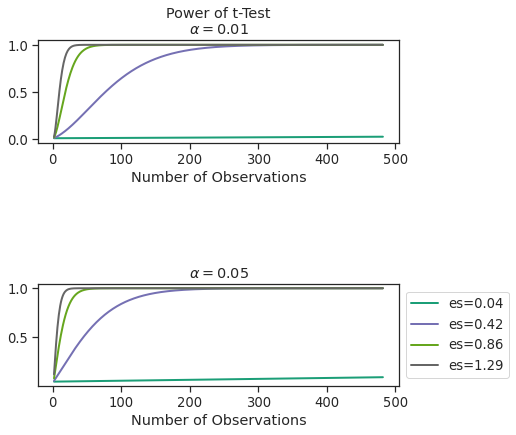

In [71]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 483),
                                 effect_size=np.array([0.04,0.42, 0.89, 1.29]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 483),
                                 effect_size=np.array([0.04,0.42, 0.86, 1.29]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.tight_layout()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top =1.4)

#goal = maximize power = 1- type 2 error (false negative)
# false negative = predict low skin thickness if they have high skin thickness 
# which requires different type of needle length and techniques.

In [59]:
# parameters for the analysis 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 33.02


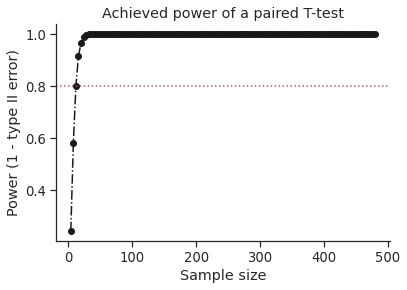

In [72]:
# Vallat, R. (2018). Pingouin: statistics in Python. Journal of Open Source Software, 3(31), 1026, https://doi.org/10.21105/joss.01026


sns.set(style='ticks', context='notebook', font_scale=1.2)
d = 0.89  # Fixed effect size
n = np.arange(4, 483, 4)  # Incrementing sample size
# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired')
# Start the plot
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()


# T-test

In [61]:
from bioinfokit.analys import stat
res = stat()
res.ttest(df = df_new, xfac = 'Outcome', res = 'SkinThickness', test_type =2, evar=False)
print(res.summary)

#result shows that p value<0.05, the t-test is significant 
#so the SkinThickness is significantly different for diabetic and non-diabetic people




Two sample t-test with unequal variance (Welch's t-test)

------------------  -------------
Mean diff            -3.53436
t                    -4.73048
Std Error             0.747145
df                  488.4
P-value (one-tail)    1.46821e-06
P-value (two-tail)    2.93642e-06
Lower 95.0%          -5.00237
Upper 95.0%          -2.06634
------------------  -------------

Parameter estimates

  Level    Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
      0       500  25.3731    9.03064     0.403863        24.5797        26.1666
      1       268  28.9075   10.2904      0.628587        27.6699        30.1451



# Multiple Regression

In [62]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['SkinThickness']



In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =0)

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
regressor.intercept_

2.624852820648485

In [66]:
regressor.coef_

array([ 8.72624932e-02, -1.36547646e-02, -1.27799551e-03,  1.32104742e-02,
        7.21585334e-01,  1.85245158e+00, -1.46522625e-02])

In [67]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

Coefficient
Pregnancies                  0.087262
Glucose                     -0.013655
BloodPressure               -0.001278
Insulin                      0.013210
BMI                          0.721585
DiabetesPedigreeFunction     1.852452
Age                         -0.014652

In [68]:
#Making Predictions
y_pred = regressor.predict(X_test)

In [69]:
df_Pred = pd.DataFrame({'Actual' : y_test,
                   'Predicted': y_pred})

df_Pred.head()

Actual  Predicted
661  43.000000  34.167857
122  30.000000  27.221449
113  20.536458  27.802997
14   19.000000  21.971317
529  20.536458  20.599690

In [70]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.127406935748445
Mean Squared Error: 61.82789511923386
Root Mean Squared Error: 7.8630716084259245
